In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style('darkgrid')

In [2]:
data_dir = Path('../data/ml-100k')


ratings = pd.read_csv(data_dir / 'u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['timestamp'].head()


0   1997-12-04 15:55:49
1   1998-04-04 19:22:22
2   1997-11-07 07:18:36
3   1997-11-27 05:02:03
4   1998-02-02 05:33:16
Name: timestamp, dtype: datetime64[ns]

In [4]:
movies = pd.read_csv(data_dir/'u.item', sep='|', encoding='latin-1', names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 
    'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 
    'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

movies.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
users = pd.read_csv(data_dir/'u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
merged_data = pd.merge(pd.merge(ratings, users, on='user_id'), movies, on='movie_id')
merged_data.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,movie_title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),01-Jan-1997,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,1997-11-07 07:18:36,25,M,writer,40206,Heavyweights (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,1997-11-27 05:02:03,28,M,technician,80525,Legends of the Fall (1994),01-Jan-1994,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,1998-02-02 05:33:16,47,M,educator,55113,Jackie Brown (1997),01-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


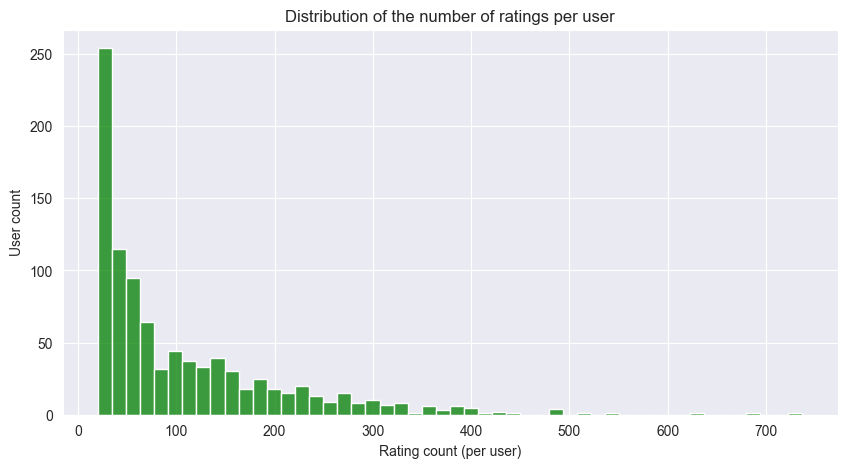

In [15]:
user_activity = ratings['user_id'].value_counts()
plt.figure(figsize=(10, 5))
sns.histplot(user_activity, bins=50, color='green')

plt.xlabel('Rating count (per user)')
plt.ylabel('User count')
plt.title('Distribution of the number of ratings per user')

plt.show()


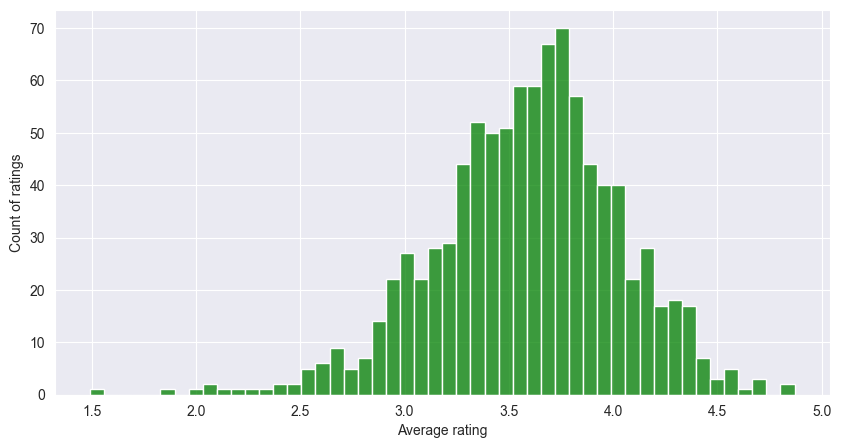

In [13]:
user_mean_rating = ratings.groupby('user_id')['rating'].mean()

plt.figure(figsize=(10, 5))
sns.histplot(user_mean_rating, bins=50, color='green')

plt.xlabel('Average rating')
plt.ylabel('Count of ratings')

plt.show()

In [29]:
# Let see top 10 most popular popular films

movie_popularity = ratings.groupby('movie_id')['rating'].count().reset_index()
movie_popularity.columns = ['movie_id', 'rating_count']

popular_movies = pd.merge(movie_popularity, movies[['movie_id', 'movie_title']], on='movie_id')
popular_movies = popular_movies.sort_values(by='rating_count', ascending=False)

print(popular_movies[['movie_title', 'rating_count']].head(10))

                       movie_title  rating_count
49                Star Wars (1977)           583
257                 Contact (1997)           509
99                    Fargo (1996)           508
180      Return of the Jedi (1983)           507
293               Liar Liar (1997)           485
285    English Patient, The (1996)           481
287                  Scream (1996)           478
0                 Toy Story (1995)           452
299           Air Force One (1997)           431
120  Independence Day (ID4) (1996)           429
